<a href="https://colab.research.google.com/github/Hash-sd/Data-Mining/blob/main/LINEAR_DISCRIMINANT_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Andi sedang mempelajari teknik Linear Discriminant Analysis (LDA) untuk mengklasifikasikan data menjadi dua kelas, yaitu kelas A dan kelas B. Andi diberikan data dengan dua fitur, yaitu x1 dan x2, serta label kelasnya sebagai berikut:

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [2]:
# Mendefinisikan data
data = {
    'x1' : [3, -1, 2, -2, 1, 5, 6, -3, 0, 4, -4, 2],
    'x2' : [1, -2, 3, -1, 0, 2, -3, 3, -2, 1, 4, -1],
    'kelas' : ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mendefinisikan fitur (X) dan label kelas (y)
X = df[['x1', 'x2']].values
y = df['kelas'].values

df

,x1,x2,kelas
0,3,1,A
1,-1,-2,A
2,2,3,A
3,-2,-1,A
4,1,0,B
5,5,2,B
6,6,-3,B
7,-3,3,B
8,0,-2,A
9,4,1,A


*   Tentukan mean (rata-rata) dari masing-masing kelas A dan B untuk setiap fitur x1 dan x2

In [3]:
# Menghitung mean untuk setiap kelas
mean_A = X[y == 'A'].mean(axis=0)
mean_B = X[y == 'B'].mean(axis=0)

# Menampilkan hasil mean untuk masing-masing kelas
print("Mean Kelas A:", mean_A)
print("Mean Kelas B:", mean_B)

Mean Kelas A: [1. 0.]
Mean Kelas B: [1.16666667 0.83333333]


*   Hitung Matriks Scatter Dalam Kelas (Within-Class Scatter Matrix) Swberdasarkan data
di atas.

In [4]:
# Inisialisasi matriks scatter dalam kelas
Sw = np.zeros((2, 2))

# Menghitung matriks scatter dalam kelas (Sw)
for i in range(len(X)):
    x = X[i].reshape(2, 1)
    if y[i] == 'A':
        mean_vec = mean_A.reshape(2, 1)
    else:
        mean_vec = mean_B.reshape(2, 1)
    Sw += (x - mean_vec).dot((x - mean_vec).T)

# Menampilkan matriks scatter dalam kelas
print("Within-Class Scatter Matrix (Sw):\n", Sw)

Within-Class Scatter Matrix (Sw):
 [[110.83333333 -23.83333333]
 [-23.83333333  54.83333333]]


*   Hitung Matriks Scatter Antar Kelas (Between-Class Scatter Matrix) Sb dari data
tersebut.

In [5]:
# Menghitung rata-rata total
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)

# Menghitung matriks scatter antar kelas (Sb) tanpa *5
Sb =  (mean_A - mean_total).dot((mean_A - mean_total).T) + \
      (mean_B - mean_total).dot((mean_B - mean_total).T)

# Menampilkan matriks scatter antar kelas
print("Between-Class Scatter Matrix (Sb):\n", Sb)

Between-Class Scatter Matrix (Sb):
 [[0.01388889 0.06944444]
 [0.06944444 0.34722222]]


In [6]:
# Menghitung rata-rata total
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)

# Menghitung matriks scatter antar kelas (Sb)
Sb = 5 * (mean_A - mean_total).dot((mean_A - mean_total).T) + \
     5 * (mean_B - mean_total).dot((mean_B - mean_total).T)

# Menampilkan matriks scatter antar kelas
print("Between-Class Scatter Matrix (Sb):\n", Sb)

Between-Class Scatter Matrix (Sb):
 [[0.06944444 0.34722222]
 [0.34722222 1.73611111]]


*   Jelaskan bagaimana Andi bisa menggunakan hasil perhitungan dari Sw dan Sb untuk
menemukan vektor proyeksi yang memisahkan kelas A dan B secara maksimal.

In [7]:
# Menyelesaikan persamaan nilai eigen
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

# Menampilkan nilai eigen dan vektor eigen
print("Nilai Eigen:\n", eig_vals)
print("Vektor Eigen:\n", eig_vecs)

Nilai Eigen:
 [0.         0.03862133]
Vektor Eigen:
 [[-0.98058068 -0.28825968]
 [ 0.19611614 -0.95755227]]


In [8]:
# Memilih indeks nilai eigen tertinggi
idx = np.argmax(eig_vals)

# Memilih vektor eigen yang sesuai dengan nilai eigen tertinggi
w = eig_vecs[:, idx]

# Menampilkan vektor proyeksi
print("Vektor Proyeksi (w):\n", w)

Vektor Proyeksi (w):
 [-0.28825968 -0.95755227]


In [9]:
# Memproyeksikan data ke dimensi yang lebih rendah
X_lda = X.dot(w)

# Menampilkan data setelah proyeksi LDA
print("Data setelah proyeksi LDA:\n", X_lda)

Data setelah proyeksi LDA:
 [-1.82233132  2.20336423 -3.44917618  1.53407164 -0.28825968 -3.35640295
  1.14309873 -2.00787778  1.91510455 -2.110591   -2.67717037  0.38103291]


*   Apakah data tersebut bisa langsung diimplementasikan menggunakan LDA dengan
Scikit-Learn?

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA object
lda = LinearDiscriminantAnalysis()

# Project the data using LDA from Scikit-Learn
X_lda_sklearn = lda.fit_transform(X, y)

# Display the projected data
print("Data setelah proyeksi LDA (Scikit-Learn):\n", X_lda_sklearn)

Data setelah proyeksi LDA (Scikit-Learn):
 [[ 0.51619384]
 [-1.35411087]
 [ 1.27201245]
 [-1.0431631 ]
 [-0.1965231 ]
 [ 1.22891078]
 [-0.86152033]
 [ 0.60239718]
 [-1.22018782]
 [ 0.65011689]
 [ 0.91334496]
 [-0.50747088]]


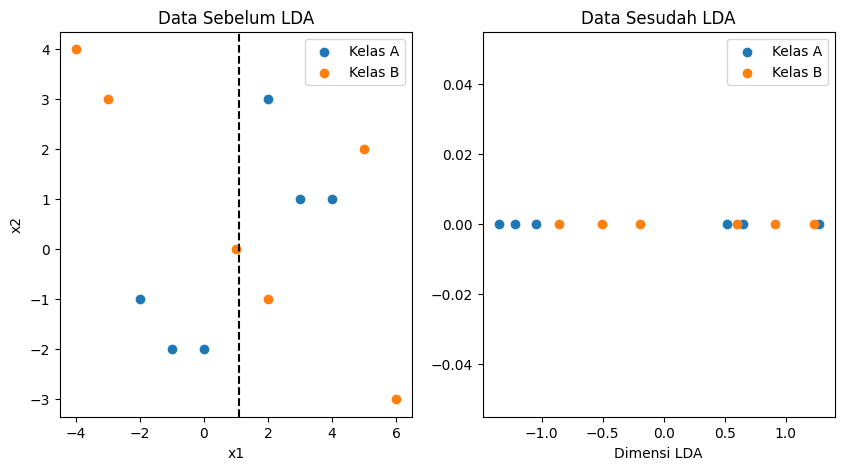

In [11]:
#library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Plot data sebelum LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 'A', 0], X[y == 'A', 1], label='Kelas A')
plt.scatter(X[y == 'B', 0], X[y == 'B', 1], label='Kelas B')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Sebelum LDA')
plt.legend()
# Tambahkan garis pemisah antar kelas
plt.axvline(x=np.mean(X[:,0]), color='black', linestyle='--')

# Plot data sesudah LDA
plt.subplot(1, 2, 2)

# Use X_lda_sklearn which contains data projected using LDA from Scikit-Learn
plt.scatter(X_lda_sklearn[y == 'A'], np.zeros_like(X_lda_sklearn[y == 'A']), label='Kelas A')
plt.scatter(X_lda_sklearn[y == 'B'], np.zeros_like(X_lda_sklearn[y == 'B']), label='Kelas B')
plt.xlabel('Dimensi LDA')

plt.title('Data Sesudah LDA')
plt.legend()

plt.show()

## Budi adalah seorang peneliti yang sedang mencoba mengklasifikasikan jenis bunga berdasarkan panjang dan lebar kelopak. Ia memiliki data dari dua jenis bunga, yaitu jenis X dan jenis Y, dengan dua fitur, yaitu panjang kelopak (x1) dan lebar kelopak (x2). Berikut adalah data yang Budi kumpulkan:



*   Tentukan mean (rata-rata) dari masing-masing jenis bunga (X dan Y) untuk setiap fitur x1 (panjang kelopak) dan x2 (lebar kelopak).



In [12]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

*   Tentukan mean (rata-rata) dari masing-masing jenis bunga (X dan Y) untuk setiap fitur
x1 (panjang kelopak) dan x2 (lebar kelopak).

In [13]:
# Mendefinisikan data
data = {
    'jenis_bunga' : ['X', 'X', 'Y', 'Y', 'X', 'X', 'X', 'Y', 'Y', 'Y'],
    'x1' : [1, 2, 3, 5, 2, 4, 1, 3, 4, 5],
    'x2' : [3, 2, 4, 1, 3, 3, 2, 2, 1, 4]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mendefinisikan fitur (X) dan label kelas (y)
X = df[['x1', 'x2']].values
y = df['jenis_bunga'].values

df

,jenis_bunga,x1,x2
0,X,1,3
1,X,2,2
2,Y,3,4
3,Y,5,1
4,X,2,3
5,X,4,3
6,X,1,2
7,Y,3,2
8,Y,4,1
9,Y,5,4


*   Hitung Matriks Scatter Dalam Kelas (Within-Class Scatter Matrix) Sw berdasarkan data
di atas.

In [14]:
# Menghitung mean untuk setiap jenis bunga
mean_X = X[y == 'X'].mean(axis=0)
mean_Y = X[y == 'Y'].mean(axis=0)

# Menampilkan hasil mean untuk masing-masing jenis bunga
print("Mean Jenis Bunga X:", mean_X)
print("Mean Jenis Bunga Y:", mean_Y)

Mean Jenis Bunga X: [2.  2.6]
Mean Jenis Bunga Y: [4.  2.4]


*   Hitung Matriks Scatter Dalam Kelas (Within-Class Scatter Matrix) Sw berdasarkan data
di atas.



In [15]:
# Inisialisasi matriks scatter dalam kelas
Sw = np.zeros((2, 2))

# Menghitung matriks scatter dalam kelas (Sw)
for i in range(len(X)):
    x = X[i].reshape(2, 1)
    if y[i] == 'A':
        mean_vec = mean_A.reshape(2, 1)
    else:
        mean_vec = mean_B.reshape(2, 1)
    Sw += (x - mean_vec).dot((x - mean_vec).T)

# Menampilkan matriks scatter dalam kelas
print("Within-Class Scatter Matrix (Sw):\n", Sw)

Within-Class Scatter Matrix (Sw):
 [[53.61111111 29.55555556]
 [29.55555556 38.27777778]]


*   Hitung Matriks Scatter Antar Kelas (Between-Class Scatter Matrix) Sb untuk data
tersebut.

In [16]:
# Menghitung rata-rata total
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)

# Menghitung matriks scatter antar kelas (Sb)
Sb = 5 * (mean_A - mean_total).dot((mean_A - mean_total).T) + \
     5 * (mean_B - mean_total).dot((mean_B - mean_total).T)

# Menampilkan matriks scatter antar kelas
print("Between-Class Scatter Matrix (Sb):\n", Sb)

Between-Class Scatter Matrix (Sb):
 [[36.80555556 40.27777778]
 [40.27777778 45.13888889]]


*   Jelaskan bagaimana Budi bisa menggunakan hasil perhitungan dari Sw dan Sbuntuk
menemukan vektor proyeksi yang memisahkan jenis bunga X dan Y secara maksimal

In [17]:
# Menyelesaikan persamaan nilai eigen
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

# Menampilkan nilai eigen dan vektor eigen
print("Nilai Eigen:\n", eig_vals)
print("Vektor Eigen:\n", eig_vecs)

Nilai Eigen:
 [0.02759841 1.20092454]
Vektor Eigen:
 [[-0.74507441 -0.17091551]
 [ 0.66698136 -0.98528569]]


In [18]:
# Memilih indeks nilai eigen tertinggi
idx = np.argmax(eig_vals)

# Memilih vektor eigen yang sesuai dengan nilai eigen tertinggi
w = eig_vecs[:, idx]

# Menampilkan vektor proyeksi
print("Vektor Proyeksi (w):\n", w)

Vektor Proyeksi (w):
 [-0.17091551 -0.98528569]
